In [1]:
from acevedo_clss_and_fcns import * 
device = 'cpu'
if torch.cuda.is_available():
    torch.cuda.init()
    if torch.cuda.is_initialized():
        device = 'cuda:0'
#device = torch.device(device)
print(f"{device = }")
#loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
#loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
#loader_train = loader.get_train_loader()
#all_graphs_weights_df.to_parquet('./results/data/non_filtered_graphs_weights_from_explainer.parquet.gzip', compression = 'gzip')

all_graphs_weights_df = pd.read_parquet('./results/data/Non_masked_graphs_weights_from_explainer.parquet.gzip')

print(f"{all_graphs_weights_df.shape=}")

/DeepenData/.miniconda/envs/geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device = 'cuda:0'
all_graphs_weights_df.shape=(43150, 4921)


((648, 4921), (43150,))

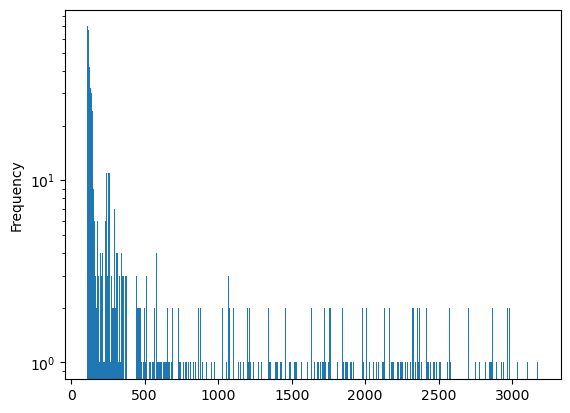

In [9]:

edge_mask = all_graphs_weights_df.sum(axis=1) > np.percentile(all_graphs_weights_df.sum(axis=1), 98.5)


filtered_graph_weights_df = all_graphs_weights_df.loc[  edge_mask, :]

filtered_graph_weights_df.sum(axis=1).plot.hist(logy = True, bins=500)
filtered_graph_weights_df.shape, edge_mask.shape

<AxesSubplot:ylabel='Frequency'>

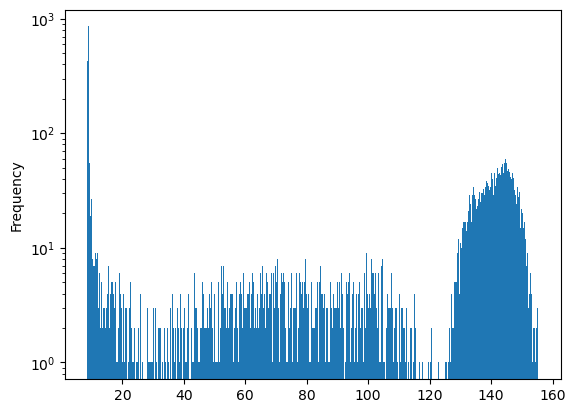

In [10]:
filtered_graph_weights_df.sum(axis=0).plot.hist(logy = True, bins=500)


In [11]:
loader_path = "./results/dataloaders/loader_Concen_plus_Fluxes.pt"
loader = torch.load(loader_path)
#loader_validation = loader.get_validation_loader()
loader_train = loader.get_train_loader()
train_labels = []
for graph in tqdm.tqdm(loader_train.dataset):
    train_labels.append(graph.y.cpu().item())
train_labels.__len__()


filtered_graph_weights = filtered_graph_weights_df.transpose() #.columns = train_labels
filtered_graph_weights["Label"] = ["PKU" if l == 0 else "Control" for l in train_labels] 


filtered_graph_weights.reset_index(drop=True, inplace=True)
filtered_graph_weights.columns = [str(col) for col in filtered_graph_weights.columns]
#filtered_graph_weights.to_parquet('./results/data/filtered_graph_weights.parquet.gzip', compression = 'gzip')
filtered_graph_weights

100%|██████████| 4921/4921 [00:00<00:00, 403120.45it/s]


,47,74,75,76,259,589,859,970,981,996,...,41971,42095,42103,42580,42680,42728,42759,42799,42978,Label
0,0.019410,0.082985,0.016251,0.358292,0.014784,0.034253,0.012295,0.033321,0.032639,0.031912,...,0.015009,0.011855,0.014272,0.027168,0.024540,0.026197,0.027640,0.029102,0.165052,Control
1,0.021881,0.101519,0.017116,0.113482,0.020140,0.037126,0.012721,0.045017,0.044434,0.043446,...,0.019983,0.015102,0.020522,0.037180,0.037479,0.043326,0.046090,0.048762,0.230146,Control
2,0.013493,0.012638,0.012342,0.012096,0.011908,0.010072,0.009387,0.013910,0.013802,0.013906,...,0.012029,0.012104,0.012493,0.014152,0.010540,0.013858,0.013715,0.013639,0.007025,Control
3,0.034198,0.963492,0.028783,0.089600,0.027763,0.779264,0.581789,0.030579,0.024847,0.029017,...,0.036986,0.022322,0.044354,0.029176,0.898497,0.024373,0.034142,0.039000,0.021039,PKU
4,0.013482,0.015123,0.012246,0.009593,0.012073,0.010086,0.008971,0.014581,0.014782,0.014620,...,0.012002,0.012113,0.012810,0.014497,0.010006,0.014526,0.014314,0.014187,0.005467,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.033936,0.966205,0.031451,0.933312,0.024518,0.829747,0.315786,0.034882,0.033255,0.032255,...,0.025729,0.045649,0.038415,0.031825,0.903373,0.025431,0.036442,0.042613,0.082091,PKU
4917,0.022440,0.158217,0.017010,0.563505,0.025705,0.046962,0.024613,0.045297,0.044583,0.043598,...,0.026016,0.014944,0.017653,0.031394,0.054822,0.035577,0.039401,0.041868,0.279131,Control
4918,0.031451,0.964040,0.036286,0.854815,0.024954,0.384560,0.185923,0.029512,0.027512,0.027521,...,0.027812,0.042154,0.036950,0.029031,0.944879,0.021488,0.030405,0.033980,0.685537,PKU
4919,0.028920,0.962757,0.030207,0.359718,0.051301,0.720999,0.538133,0.033742,0.025836,0.031994,...,0.065595,0.080532,0.042517,0.030829,0.919429,0.024663,0.034754,0.039742,0.043935,PKU


In [12]:
PYG_graph = torch.load("./results/graphs_from_PYG_and_NX/PYG_graph_Concen_plus_Fluxes.pt")


NX_graph  = nx.read_gpickle("./results/graphs_from_PYG_and_NX/grafo_nx_Concen_plus_Fluxes.gpickle")

In [13]:
edge_0_node_idxs =  PYG_graph.edge_index[0,:]
edge_1_node_idxs =  PYG_graph.edge_index[1,:]
edge_0_nodes     = [list(NX_graph.nodes)[i] for i in  edge_0_node_idxs]
edge_1_nodes     = [list(NX_graph.nodes)[i] for i in  edge_1_node_idxs]

In [14]:
edges_df = pd.DataFrame({'node1': edge_0_nodes, 'node2':edge_1_nodes})

labels =  ["PKU" if l == 0 else "Control" for l in train_labels] 

print(all_graphs_weights_df.shape, labels.__len__())
edges_node_names_explainer_subgraphs = pd.concat([edges_df, all_graphs_weights_df], axis=1).loc[edge_mask,:]


(43150, 4921) 4921


In [15]:
pd.Series(labels).to_csv("./results/data/results_for_R_labels.csv")
edges_node_names_explainer_subgraphs.to_csv("./results/data/Non_masked_edges_node_names_explainer_subgraphs.csv")